The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [67]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Start coding here!
nobel=pd.read_csv('data/nobel.csv')

# Info about the data
print(nobel.info())

nobel.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


# Question 1: What is the most commonly awarded gender and birth country?

The most common gender of Nobel Prize Winners is Male


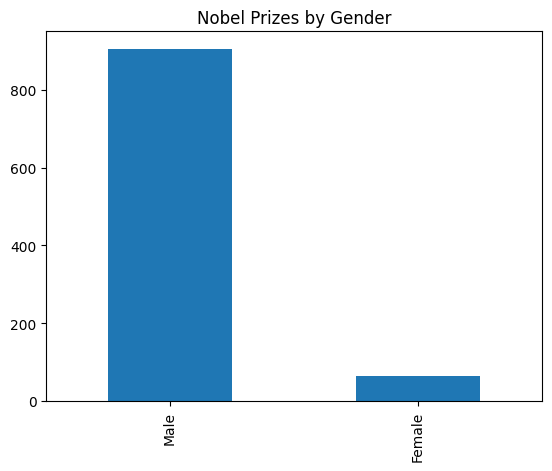

In [68]:
# Show frequencies for sex

nobel['sex'].value_counts().plot.bar(title='Nobel Prizes by Gender')
nobel_sex=nobel['sex'].value_counts().reset_index()
top_gender=nobel_sex.iloc[0,0]
print(f"The most common gender of Nobel Prize Winners is {top_gender}")




The top country where Noble Prize winners were born is United States of America


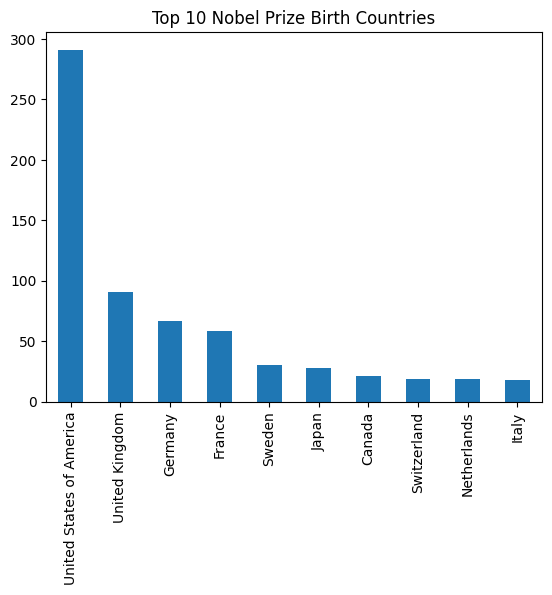

In [69]:
# Show the most common birth_country
top10_country=nobel['birth_country'].value_counts().head(10)
top10_country.plot.bar(title='Top 10 Nobel Prize Birth Countries')
top_country=top10_country.index[0]
print(f"The top country where Noble Prize winners were born is {top_country}")



# Question 2: What decade had the highest proportion of US-born winners? 

The highest proportion of US-born winners occured in the decade of 2000


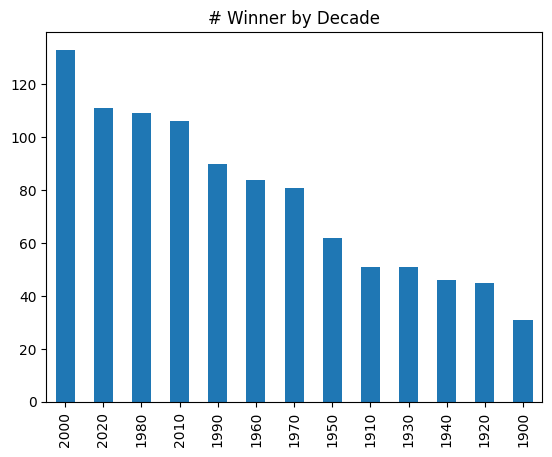

In [70]:
# Create a Decade field
nobel['decade'] = nobel['year'].round(-1)
nobel['decade'].value_counts().plot.bar(title='# Winner by Decade')

# Calculate the number of winners in each decade
nobel_decade_total = nobel.groupby('decade').size()

# Calculate the number of American winners in each decade
nobel_decade_usa = nobel[nobel['birth_country']==top_country].groupby('decade').size()

# Calculate the proportion of American winners in each decade
nobel_decade_usa_prop=nobel_decade_usa / nobel_decade_total

# Sort and select the max_decade_usa
max_decade_usa=int(pd.DataFrame(nobel_decade_usa_prop.sort_values(ascending=False).head(1)).reset_index()['decade'])
print(f"The highest proportion of US-born winners occured in the decade of {max_decade_usa}")

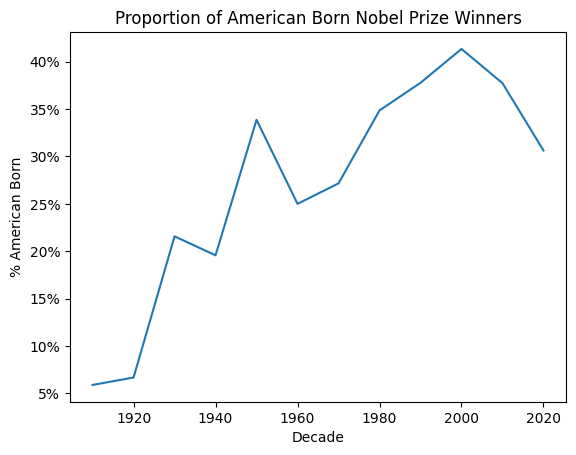

In [71]:
# Plot the proportion of American Born Nobel prize winners by decade
plt.plot(nobel_decade_usa_prop.index, nobel_decade_usa_prop.values)
plt.title("Proportion of American Born Nobel Prize Winners")
plt.xlabel("Decade")
plt.ylabel("% American Born")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
plt.show()

# Question 3: What decade and category pair had the highest proportion of female laureates?

In [72]:
# Create pairs by decade and category 
nobel_decade_cat_total = nobel.groupby(['decade','category']).size()

# Create pairs by decade and Females
nobel_decade_cat_female = nobel[nobel['sex']=='Female'].groupby(['decade','category']).size()

# Calculate the proportions of Females
nobel_decade_cat_female_prop = nobel_decade_cat_female / nobel_decade_cat_total

# Find the highest proportion of females
max_female=pd.DataFrame(nobel_decade_cat_female_prop.sort_values(ascending=False).head(1)).reset_index()
print(f"The most female Nobel Winners were in {max_female['decade'].values[0]} in {max_female['category'].values[0]}")

# Conver answer into a dict
max_female_dict={max_female['decade'][0] : max_female['category'][0]}

The most female Nobel Winners were in 2020 in Literature


In [73]:
max_female_dict

{2020: 'Literature'}

# Question 4: Who was the first woman to receive a Nobel Prize, and in what category?

In [74]:
# Find the first female to receive the Nobel Prize
first_woman=nobel[nobel['sex']=='Female'].sort_values(by='year')[['full_name','category']].iloc[0]

first_woman_name=first_woman['full_name']
first_woman_category=first_woman['category']

print(f"The first woman to with the Nobel Prize is {first_woman_name} in {first_woman_category}")


The first woman to with the Nobel Prize is Marie Curie, née Sklodowska in Physics


# Question 5: Which individuals or organizations have won multiple Nobel Prizes throughout the years?

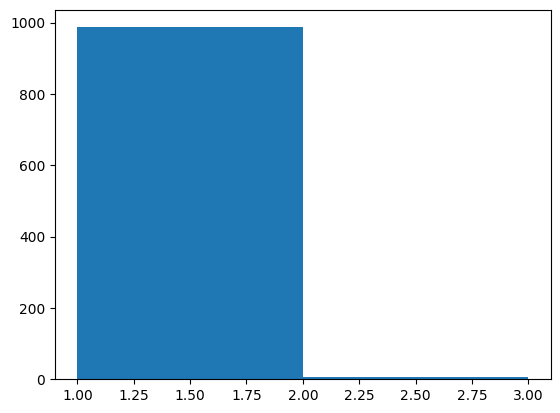

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Frederick Sanger', 'John Bardeen', 'Linus Carl Pauling', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


In [75]:
# Count how many multi winners, individuals or organizations
freq_winners = nobel.groupby('full_name').agg(wins_freq=("full_name", "size"))

# Show Histogram of number of wins
plt.hist(freq_winners['wins_freq'], bins=2)
plt.show()

# Select multi winners
#repeat_list = freq_winners[freq_winners['wins_freq'] > 1].index.tolist()

repeat_list = [full_name for full_name, row in freq_winners.iterrows() if row['wins_freq']>1]

print(repeat_list)

In [76]:
print(freq_winners[freq_winners.index.isin(repeat_list)])


                                                    wins_freq
full_name                                                    
Comité international de la Croix Rouge (Interna...          3
Frederick Sanger                                            2
John Bardeen                                                2
Linus Carl Pauling                                          2
Marie Curie, née Sklodowska                                 2
Office of the United Nations High Commissioner ...          2
